In [69]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
import matplotlib.pyplot as plt
import numpy as np

In [1]:
TRAIN_IMAGE_SIZE = 442
TEST_IMAGE_SIZE = 236
BATCH_SIZE = 32
CHANNELS = 3

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
'E:/brain_tumor/Training',
shuffle = True,
image_size = (IMAGE_SIZE , IMAGE_SIZE),
batch_size = BATCH_SIZE,
)

NameError: name 'tf' is not defined

In [72]:
CLASS_NAMES = dataset.class_names

class_names

In [73]:
CLASS_NAMES

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [74]:
len(dataset)

68

(256, 256, 3)
[0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 2 0 1 0 1 0 1 0 1 1 1 0 1 1 1]


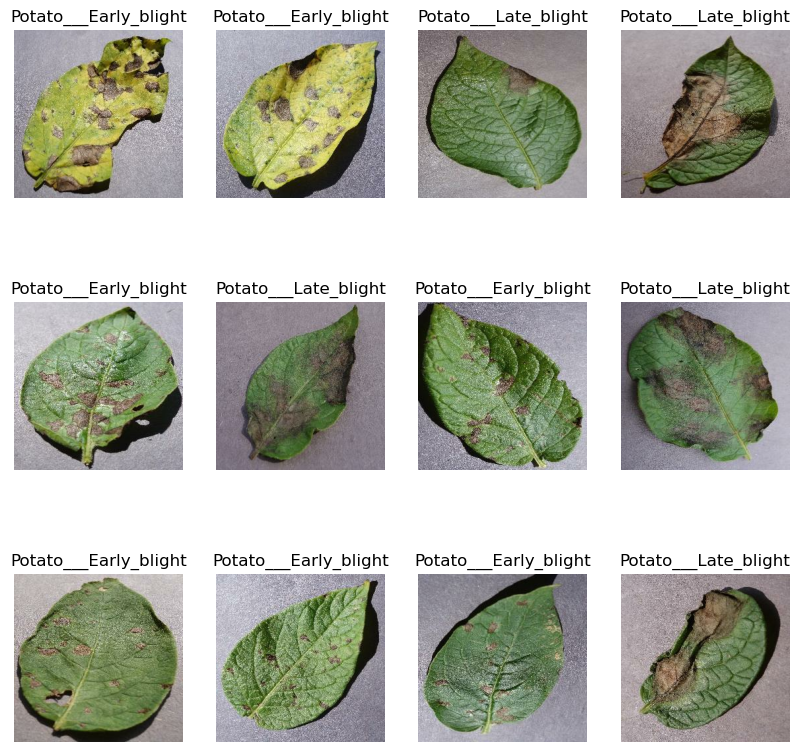

In [75]:
 plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
       
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint32'))
        plt.axis('off')
        plt.title(CLASS_NAMES[label_batch[i]])
print(image_batch[0].shape)
print(label_batch.numpy())

In [76]:
len(dataset)

68

In [77]:
## 80% ==> training
## 20% ==> 10% validation, 10% test

In [78]:
train_size = 0.8

len(dataset)*train_size

54.400000000000006

In [79]:
train_size

0.8

In [80]:
train_dataset = dataset.take(54)

In [81]:
len(train_dataset)

54

In [82]:
test_dataset = dataset.skip(54)

In [83]:
val_size = 0.1

In [84]:
len(dataset)*val_size 

6.800000000000001

In [85]:
val_dataset = test_dataset.take(6)

In [86]:
len(val_dataset)

6

In [87]:
test_dataset = test_dataset.skip(6)

In [88]:
len(test_dataset)

8

In [89]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [93]:
import tensorflow as tf
from tensorflow.keras import layers


resize_and_rescale = tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [95]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [98]:
input_shape =(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(32, (3,3), activation = 'relu', input_shape =input_shape),
    MaxPooling2D((2,2)),
     Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
     Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
     Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
     Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(n_classes , activation = 'softmax')
])
model.build(input_shape = input_shape)

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_10 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [100]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
)

In [102]:
history = model.fit(
train_dataset,
epochs = 5,
batch_size =BATCH_SIZE,
    verbose =1,
    validation_data = val_dataset
)

Epoch 1/5
54/54 [==============================] - 126s 2s/step - loss: 0.7657 - accuracy: 0.6169 - val_loss: 0.5623 - val_accuracy: 0.8281
Epoch 2/5
54/54 [==============================] - 138s 3s/step - loss: 0.4814 - accuracy: 0.8131 - val_loss: 0.5404 - val_accuracy: 0.7656
Epoch 3/5
54/54 [==============================] - 145s 3s/step - loss: 0.4521 - accuracy: 0.8310 - val_loss: 0.3532 - val_accuracy: 0.8750
Epoch 4/5
54/54 [==============================] - 143s 3s/step - loss: 0.3222 - accuracy: 0.8646 - val_loss: 0.3267 - val_accuracy: 0.8542
Epoch 5/5
54/54 [==============================] - 131s 2s/step - loss: 0.2313 - accuracy: 0.9120 - val_loss: 0.2014 - val_accuracy: 0.9375


In [103]:
scores = model.evaluate(test_dataset)

8/8 [==============================] - 6s 568ms/step - loss: 0.2115 - accuracy: 0.9353


In [104]:
scores

[0.2114931344985962, 0.9353448152542114]

In [105]:
history

In [106]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [107]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
first image's actual label:  Potato___Late_blight
1/1 [==============================] - 1s 634ms/step
the predicted label:  Potato___Early_blight


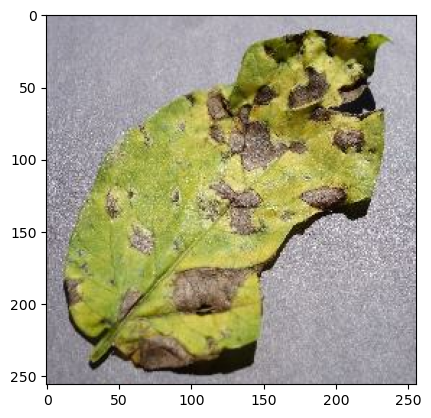

In [132]:
for images_batch, labels_batch in test_dataset.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    
    import numpy as np
    batch_prediction = model.predict(images_batch)
    print("the predicted label: ",class_names[np.argmax([batch_prediction[0]])])